In [102]:
import networkx as nx
import random
import collections
import matplotlib.pyplot as plt
import numpy as np

# SI MODEL 

In [62]:
# model parameters
beta=0.1
i0=3
# network parameter (random graph)
N=1000
avK=6

# network parameter (BA graph)
N=1000
m=3

p=avK/N

### INITIALIZATION

In [56]:
# 1- generate graph
#G=nx.erdos_renyi_graph(N,p)
G=nx.barabasi_albert_graph(N,m)

# 2- assign all S states to nodes
for node in G.nodes():
    G.nodes[node]['status']='S'
    
# 3- select i0 initial infected
iniI=random.sample(G.nodes(),3)
for node in iniI:
    G.nodes[node]['status']='I'

### TEMPORAL LOOP

In [86]:
# EVOLUTION FUNCTION
def SI_updateStates(Graph):
    newStates={node:Graph.nodes[node]['status'] for node in Graph.nodes()}
    infected=[node for node in Graph.nodes() if Graph.nodes[node]['status']=='I']
    for node in infected:
        for s_neigh in [node2 for node2 in Graph.neighbors(node) if Graph.nodes[node2]['status']=='S']:
            r=random.uniform(0,1)
            if r<beta:
                newStates[s_neigh]='I'
    return newStates

In [87]:
#--------initialization--------------

# 1- generate graph
#G=nx.erdos_renyi_graph(N,p)
G=nx.barabasi_albert_graph(N,m)

# 2- assign all S states to nodes
for node in G.nodes():
    G.nodes[node]['status']='S'
    
# 3- select i0 initial infected
iniI=random.sample(G.nodes(),3)
for node in iniI:
    G.nodes[node]['status']='I'


I=[]
S=[]
#----------------------------------
    

for time in range(100):
    newStates=SI_updateStates(G)
    for node in G.nodes():
        G.nodes[node]['status']=newStates[node]
    
    S.append(collections.Counter(newStates.values())['S'])
    I.append(collections.Counter(newStates.values())['I'])

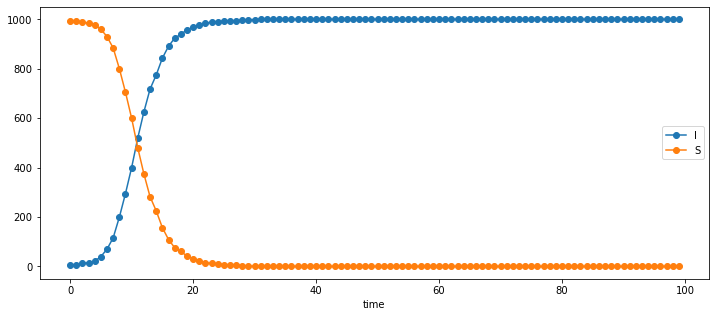

In [88]:
plt.figure(figsize=(12,5))
plt.plot(range(len(S)),I,'o-',label='I')
plt.plot(range(len(S)),S,'o-',label='S')
plt.xlabel('time')
plt.legend()
plt.show()

# SIR MODEL 


In [89]:
# model parameters
beta=0.1
mu=0.03
i0=3

# network parameter (random graph)
N=1000
avK=6

# network parameter (BA graph)
N=1000
m=3

p=avK/N

In [90]:
# EVOLUTION FUNCTION
def SIR_updateStates(Graph):
    newStates={node:Graph.nodes[node]['status'] for node in Graph.nodes()}
    infected=[node for node in Graph.nodes() if Graph.nodes[node]['status']=='I']
    for node in infected:
        for s_neigh in [node2 for node2 in Graph.neighbors(node) if Graph.nodes[node2]['status']=='S']:
            r=random.uniform(0,1)
            if r<beta:
                newStates[s_neigh]='I'
        r2=random.uniform(0,1)
        if r2<mu:
            newStates[node]='R'
    return newStates

In [96]:
#--------initialization--------------

# 1- generate graph
G=nx.erdos_renyi_graph(N,p)
#G=nx.barabasi_albert_graph(N,m)

# 2- assign all S states to nodes
for node in G.nodes():
    G.nodes[node]['status']='S'
    
# 3- select i0 initial infected
iniI=random.sample(G.nodes(),3)
for node in iniI:
    G.nodes[node]['status']='I'


I=[]
S=[]
R=[]
#----------------------------------
    

for time in range(200):
    newStates=SIR_updateStates(G)
    for node in G.nodes():
        G.nodes[node]['status']=newStates[node]
    
    S.append(collections.Counter(newStates.values())['S'])
    I.append(collections.Counter(newStates.values())['I'])
    R.append(collections.Counter(newStates.values())['R'])

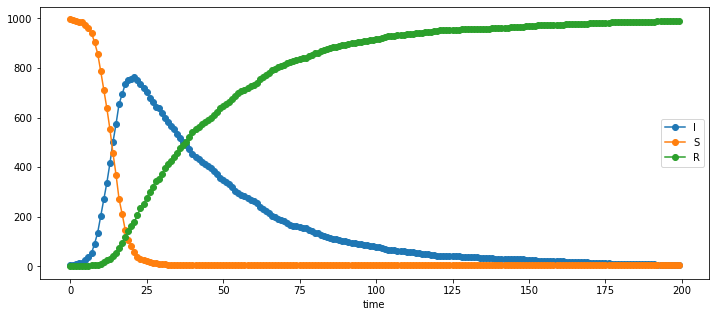

In [97]:
plt.figure(figsize=(12,5))
plt.plot(range(len(S)),I,'o-',label='I')
plt.plot(range(len(S)),S,'o-',label='S')
plt.plot(range(len(S)),R,'o-',label='R')
plt.xlabel('time')
plt.legend()
plt.show()

# comparison SIR on ER-BA

In [98]:
# model parameters
beta=0.1
mu=0.03
i0=3

# network parameter (random graph)
N=1000
avK=6

# network parameter (BA graph)
N=1000
m=3

p=avK/N

In [100]:
#--------ER--------------

# 1- generate graph
G_ER=nx.erdos_renyi_graph(N,p)

# 2- assign all S states to nodes
for node in G_ER.nodes():
    G_ER.nodes[node]['status']='S'
    
# 3- select i0 initial infected
iniI=random.sample(G_ER.nodes(),3)
for node in iniI:
    G_ER.nodes[node]['status']='I'

I_ER=[]
S_ER=[]
R_ER=[]

    

for time in range(200):
    newStates=SIR_updateStates(G_ER)
    for node in G_ER.nodes():
        G_ER.nodes[node]['status']=newStates[node]
    
    S_ER.append(collections.Counter(newStates.values())['S'])
    I_ER.append(collections.Counter(newStates.values())['I'])
    R_ER.append(collections.Counter(newStates.values())['R'])
#----------------------------------

#--------ER--------------

# 1- generate graph
#G=nx.erdos_renyi_graph(N,p)
G_BA=nx.barabasi_albert_graph(N,m)

# 2- assign all S states to nodes
for node in G.nodes():
    G_BA.nodes[node]['status']='S'
    
# 3- select i0 initial infected
iniI=random.sample(G_BA.nodes(),3)
for node in iniI:
    G_BA.nodes[node]['status']='I'

I_BA=[]
S_BA=[]
R_BA=[]

    

for time in range(200):
    newStates=SIR_updateStates(G_BA)
    for node in G_BA.nodes():
        G_BA.nodes[node]['status']=newStates[node]
    
    S_BA.append(collections.Counter(newStates.values())['S'])
    I_BA.append(collections.Counter(newStates.values())['I'])
    R_BA.append(collections.Counter(newStates.values())['R'])
#----------------------------------


In [110]:
np.mean(list(dict(G_BA.degree()).values()))

5.982

In [111]:
np.mean(list(dict(G_ER.degree()).values()))

6.082

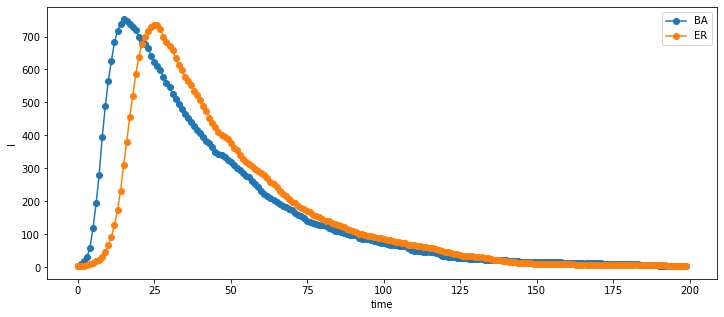

In [112]:
plt.figure(figsize=(12,5))
plt.plot(range(len(S)),I_BA,'o-',label='BA')
plt.plot(range(len(S)),I_ER,'o-',label='ER')
plt.ylabel('I')
plt.xlabel('time')
plt.legend()
plt.show()